In [36]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder

In [37]:
(X_train,y_train),(X_test, y_test)=datasets.cifar10.load_data()

In [38]:
X_train.shape

(50000, 32, 32, 3)

In [39]:
X_test.shape

(10000, 32, 32, 3)

In [40]:
y_train[:5] # we have to reshape , because we dont need 2 dimensional array to plot 

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [68]:
y_train = y_train.reshape(-1, )
y_test = y_test.reshape(-1,)

In [86]:
classes = ["aeroplane", "automobile", "bird", "cat","deer", "dog", "frog", "horse", "ship", "truck"]

In [43]:
classes[2]

'bird'

In [44]:
def plot_sample(X, y, index ):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])




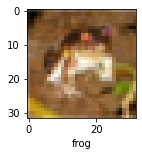

In [45]:
plot_sample(X_train, y_train, 0)

In [46]:
# We have to normalize our data as we are dealing with the images , we have to devide it by 255

In [47]:
#one hot encode
#cat_encoder = OneHotEncoder()
#y_train = cat_encoder.fit_transform(y_train)
#print(y_train)

In [48]:
X_train[0]/255

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [49]:
X_train = X_train/255

In [50]:
X_test = X_test/255

In [51]:
#first we will build a simmple artificial neural network before convalutional NN

In [52]:
ann = models.Sequential([
                        layers.Flatten(input_shape= (32,32,3)),
                        layers.Dense(3000, activation= 'relu'),
                        layers.Dense(1000, activation="relu"),
                        layers.Dense(10, activation="sigmoid")
])


ann.compile(optimizer= "SGD",
            loss = "sparse_categorical_crossentropy", 
            metrics = ["accuracy"])


ann.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.9348 - accuracy: 0.3067
Epoch 2/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6521 - accuracy: 0.4177
Epoch 3/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5562 - accuracy: 0.4532
Epoch 4/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4993 - accuracy: 0.4694
Epoch 5/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4360 - accuracy: 0.4957


In [54]:
ann.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.5194 - accuracy: 0.4572


[1.5194369554519653, 0.45719999074935913]

In [55]:
# now we will build CNN 

In [56]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = ann.predict(X_test)

In [57]:
y_pred

array([[0.5218288 , 0.6412923 , 0.7423714 , ..., 0.05105751, 0.58947533,
        0.0807384 ],
       [0.93099827, 0.9766865 , 0.34455067, ..., 0.09581369, 0.94392896,
        0.9834933 ],
       [0.98418105, 0.9312918 , 0.4668884 , ..., 0.24220742, 0.9508084 ,
        0.9157865 ],
       ...,
       [0.1255363 , 0.08592485, 0.73255974, ..., 0.5086093 , 0.387494  ,
        0.18988723],
       [0.5110353 , 0.41229782, 0.7878116 , ..., 0.23874432, 0.2281219 ,
        0.21518362],
       [0.63086545, 0.26243162, 0.77075595, ..., 0.8390835 , 0.16339602,
        0.3589129 ]], dtype=float32)

In [58]:
y_pred_classes = [np.argmax(element) for element in y_pred]

In [61]:
print("Classification report ", classification_report(y_test, y_pred_classes))

Classification report                precision    recall  f1-score   support

           0       0.38      0.73      0.50      1000
           1       0.45      0.74      0.56      1000
           2       0.31      0.47      0.38      1000
           3       0.39      0.29      0.33      1000
           4       0.45      0.30      0.36      1000
           5       0.50      0.26      0.34      1000
           6       0.54      0.51      0.52      1000
           7       0.70      0.40      0.51      1000
           8       0.71      0.37      0.48      1000
           9       0.52      0.51      0.52      1000

    accuracy                           0.46     10000
   macro avg       0.50      0.46      0.45     10000
weighted avg       0.50      0.46      0.45     10000



In [64]:
model = models.Sequential([
                         layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu', input_shape = (32,32,3) ),

                         layers.MaxPooling2D((2,2)),

                         layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu', input_shape = (32,32,3) ),
                         layers.MaxPooling2D((2,2)),


                         
                         #dense network
                         layers.Flatten(),
                         layers.Dense(3000, activation= 'relu'),
                        
                         layers.Dense(10, activation="softmax")
])

In [65]:
model.compile(optimizer="adam", 
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])

In [66]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 11s 4ms/step - loss: 1.5502 - accuracy: 0.4418
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9417 - accuracy: 0.6678
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6878 - accuracy: 0.7591
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.4502 - accuracy: 0.8452
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2451 - accuracy: 0.9170
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1278 - accuracy: 0.9604
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0825 - accuracy: 0.9741
Epoch 8/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0733 - accuracy: 0.9767
Epoch 9/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0606 - accuracy: 0.9820
Epoch 10/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.05

In [67]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.7382 - accuracy: 0.7008


[1.738218903541565, 0.7008000016212463]

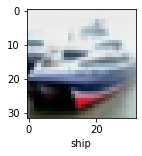

In [69]:
plot_sample(X_test, y_test,1)

In [70]:
y_pred = model.predict(X_test)

In [72]:
y_pred[:5]

array([[8.0802973e-09, 3.7262160e-07, 1.1008457e-07, 9.6144623e-01,
        2.1318694e-08, 3.8522821e-02, 1.9619625e-05, 7.5104745e-06,
        2.9091443e-06, 3.8907143e-07],
       [5.3624466e-05, 9.7472215e-01, 3.3706772e-12, 4.2067080e-13,
        5.0081839e-16, 2.1557913e-18, 2.0946551e-15, 5.1738477e-16,
        2.5209032e-02, 1.5181039e-05],
       [1.0660316e-03, 9.8556048e-01, 5.0329263e-06, 6.6130488e-05,
        1.1104051e-05, 3.8849235e-09, 1.9742583e-09, 2.6029142e-05,
        7.9881679e-03, 5.2768770e-03],
       [9.9847990e-01, 1.2801216e-05, 2.3529294e-04, 7.5407524e-04,
        5.2524356e-08, 1.9197701e-11, 3.4609305e-12, 5.8235345e-13,
        5.1759585e-04, 2.5265535e-07],
       [9.5269468e-14, 1.0099468e-07, 1.3019221e-03, 9.4241019e-05,
        6.5198225e-01, 1.8822293e-04, 3.4643313e-01, 2.3118514e-12,
        6.6092213e-08, 7.9042779e-11]], dtype=float32)

In [73]:
y_classes = [np.argmax(element) for element in y_pred]

In [81]:
y_test[:10] # actual values  

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1], dtype=uint8)

In [82]:
y_classes[:10] #predicted value

[3, 1, 1, 0, 4, 6, 1, 6, 3, 9]

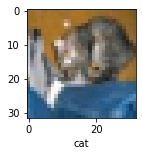

In [78]:
plot_sample(X_test, y_test, 0)

In [88]:
classes[y_classes[0]] # predicted right

'cat'

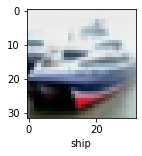

In [90]:
plot_sample(X_test, y_test,1)

In [91]:
classes[y_classes[1]] #predicted wrong

'automobile'